In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [45]:
stock_data = pd.read_csv('./data/stock_data.csv', index_col = 0)
stock_data.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
0,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010
1,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002
2,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797
3,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683
4,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907


In [47]:
stock_test1 = stock_data.drop(index = [stock_data.shape[0] - 1])
stock_test1.index = [i for i in range(1,stock_test1.shape[0]+1)]
stock_test1.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
1,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010
2,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002
3,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797
4,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683
5,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907


In [48]:
stock_test1[['nextClose', 'nextCHG', 'nextCHGPct']] = stock_data.iloc[1:][['closeIndex','CHG','CHGPct']]
stock_test1.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,nextClose,nextCHG,nextCHGPct
1,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010,995.42,-8.03,-0.008002
2,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002,978.70,-16.72,-0.016797
3,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797,1000.90,22.20,0.022683
4,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683,986.98,-13.92,-0.013907
5,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907,974.08,-12.90,-0.013070


In [49]:
stock_test1['scalingVol'] = stock_test1['turnoverVol'].apply(lambda x: x/1000000)
stock_test1.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,nextClose,nextCHG,nextCHGPct,scalingVol
1,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010,995.42,-8.03,-0.008002,1476.2526
2,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002,978.70,-16.72,-0.016797,1593.6066
3,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797,1000.90,22.20,0.022683,1022.6193
4,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683,986.98,-13.92,-0.013907,1607.1687
5,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907,974.08,-12.90,-0.013070,1294.5710


In [50]:
stock_test1['const'] = 1

In [65]:
lm = sm.OLS(stock_test1['nextClose'], stock_test1[['const','closeIndex']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              nextClose   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.033e+06
Date:                Sat, 27 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:01:59   Log-Likelihood:                -18951.
No. Observations:                3469   AIC:                         3.791e+04
Df Residuals:                    3467   BIC:                         3.792e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9670      3.033      2.297      0.022       1.020      12.914
closeIndex     0.9979      0.001   1016.417      0.000       0.996       1.000
==============================================================================
Omnibus:                      760.189   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7077.090
Skew:                          -0.772   Prob(JB):                         0.00
Kurtosis:                       9.825   Cond. No.                     9.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
results.params

const         6.967013
closeIndex    0.997898
dtype: float64

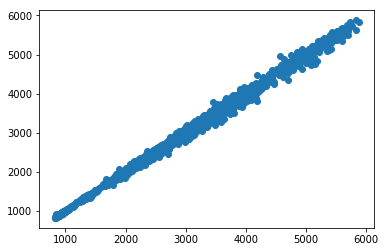

In [64]:
plt.scatter(x = stock_test1['closeIndex'], y = stock_test1['nextClose']);

In [68]:
# 用sklearn 试一下
X = stock_test1[['closeIndex']]
y = stock_test1['nextClose']
X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.20, random_state=0)

In [69]:
line_mod = LinearRegression()
line_mod.fit(X_train,y_train)
preds = line_mod.predict(X_test)

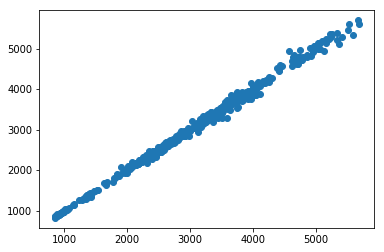

In [74]:
plt.scatter(x = preds, y = y_test.values);

In [76]:
preds[:10]

array([2469.26803438, 2537.99625503, 3238.01776732, 3773.26808315,
       3563.88887047, 3420.37245719, 2479.60070548, 3081.69821708,
       2567.21896385, 2248.01323146])

In [77]:
y_test[:10]

2066    2421.370
437     2452.830
2681    3181.026
2580    3774.383
2833    3528.955
1162    3469.050
1946    2462.110
486     3121.320
2329    2558.610
2138    2215.920
Name: nextClose, dtype: float64

In [80]:
stock_test1['nextCHG'].apply(lambda x: 1 if x > 0 else 0)[:10]

1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    0
Name: nextCHG, dtype: int64

In [81]:
stock_test1['rise'] = stock_test1['nextCHG'].apply(lambda x: 1 if x > 0 else 0)

In [82]:
stock_test1.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,nextClose,nextCHG,nextCHGPct,scalingVol,const,rise
1,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010,995.42,-8.03,-0.008002,1476.2526,1,0
2,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002,978.70,-16.72,-0.016797,1593.6066,1,0
3,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797,1000.90,22.20,0.022683,1022.6193,1,1
4,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683,986.98,-13.92,-0.013907,1607.1687,1,0
5,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907,974.08,-12.90,-0.013070,1294.5710,1,0


In [90]:
X = stock_test1[['closeIndex','highestIndex','lowestIndex','scalingVol']]
y = stock_test1['rise']
X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.20, random_state=0)

In [91]:
log_mod = LogisticRegression()
log_mod.fit(X_train,y_train)
preds = log_mod.predict(X_test)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
precision_score(y_test, preds)

0.5714285714285714

In [93]:
recall_score(y_test, preds)

0.7282051282051282

In [94]:
accuracy_score(y_test, preds)

0.5403458213256485

In [95]:
confusion = confusion_matrix(y_test, preds)
confusion_pd = pd.DataFrame(confusion, index = ['test_0','test_1'], columns = ['pred_0','pred_1'])

In [96]:
confusion_pd

,pred_0,pred_1
test_0,91,213
test_1,106,284


In [98]:
stock_test1.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,nextClose,nextCHG,nextCHGPct,scalingVol,const,rise
1,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010,995.42,-8.03,-0.008002,1476.2526,1,0
2,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002,978.70,-16.72,-0.016797,1593.6066,1,0
3,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797,1000.90,22.20,0.022683,1022.6193,1,1
4,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683,986.98,-13.92,-0.013907,1607.1687,1,0
5,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907,974.08,-12.90,-0.013070,1294.5710,1,0


In [100]:
stock_test1['tradeDate'] = pd.to_datetime(stock_test1['tradeDate'])
stock_test1.dtypes

tradeDate       datetime64[ns]
closeIndex             float64
highestIndex           float64
lowestIndex            float64
turnoverVol              int64
CHG                    float64
CHGPct                 float64
nextClose              float64
nextCHG                float64
nextCHGPct             float64
scalingVol             float64
const                    int64
rise                     int64
dtype: object

#### 前N天的
	1. 股价差/ 涨跌幅   (1 和  3 线性相关啊)
	2. 平均股价    rolling.mean
	3. 变化平均速度（变化量/时间）rolling_change
	4. 连续变化天数（连续增长，连续下跌）
	5. 连续变化量
	6. 连续变化速度
	7. 反向涨跌变化小于某个幅度，可以认为在继续这个趋势，继续往前取天数（这个需要观察）

rolling 函数


In [109]:
# window 滚动窗口大小
# min_periods ： 最小观察值
stock_test1['closeIndex'].rolling(window = 10, min_periods = 1).mean()[:10]

1     1003.450000
2      999.435000
3      992.523333
4      994.617500
5      993.090000
6      989.921667
7      986.185714
8      983.648750
9      980.006667
10     976.404000
Name: closeIndex, dtype: float64

In [112]:
N_mean = stock_test1.drop(columns = ['tradeDate']).rolling(window = 10, min_periods = 1).mean()

In [113]:
N_mean.head()

,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,nextClose,nextCHG,nextCHGPct,scalingVol,const,rise
1,1003.450000,1003.7000,979.5300,1.476253e+09,18.7200,0.019010,995.420000,-8.0300,-0.008002,1476.25260,1.0,0.000000
2,999.435000,1006.2200,986.1500,1.534930e+09,5.3450,0.005504,987.060000,-12.3750,-0.012400,1534.92960,1.0,0.000000
3,992.523333,1002.0500,983.5000,1.364160e+09,-2.0100,-0.001930,991.673333,-0.8500,-0.000705,1364.15950,1.0,0.333333
4,994.617500,1003.1625,984.6125,1.424912e+09,4.0425,0.004223,990.500000,-4.1175,-0.004006,1424.91180,1.0,0.250000
5,993.090000,1003.8140,984.8060,1.398844e+09,0.4500,0.000597,987.216000,-5.8740,-0.005819,1398.84364,1.0,0.200000


In [115]:
stock_test1[['N_Close', 'N_High', 'N_low', 'N_Vol', 'N_CHG']] = N_mean[['closeIndex', 'highestIndex', 'lowestIndex', 'scalingVol', 'CHG']]

In [140]:
stock_test1['closeIndex'][1]

1003.45

In [233]:
def stock_lab(data, row = [], col = ''):
    X = data[row]
    y = data[col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=0)
    #log_mod = LogisticRegression(fit_intercept = True)
    log_mod = LogisticRegressionCV(Cs = 10,fit_intercept = True, solver = 'liblinear')
    log_mod.fit(X_train,y_train)
    preds = log_mod.predict(X_test)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print("精确率：{}".format(precision))
    print("召回率：{}".format(recall))
    print("准确率：{}".format(accuracy))
    

In [180]:
stock_lab(stock_test1, 
          row = ['CHG','N_Close','N_Vol','N_CHG'],
          col = 'rise')

精确率：0.5623987034035657
召回率：0.8897435897435897
准确率：0.5489913544668588


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [151]:
# 这里面传进来的data是从上到下截取
def rolling_change(datas):
    rows = datas.shape[0]
    return (datas.iloc[rows - 1] - datas.iloc[0])/rows

In [153]:
stock_test1['N_Change'] = stock_test1['closeIndex'].rolling(window = 10, min_periods = 1).apply(rolling_change, raw = False)

In [154]:
stock_test1.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,nextClose,nextCHG,nextCHGPct,scalingVol,const,rise,N_Close,N_High,N_low,N_Vol,N_CHG,N_Change
1,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010,995.42,-8.03,-0.008002,1476.2526,1,0,1003.450000,1003.7000,979.5300,1476.25260,18.7200,0.0000
2,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002,978.70,-16.72,-0.016797,1593.6066,1,0,999.435000,1006.2200,986.1500,1534.92960,5.3450,-4.0150
3,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797,1000.90,22.20,0.022683,1022.6193,1,1,992.523333,1002.0500,983.5000,1364.15950,-2.0100,-8.2500
4,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683,986.98,-13.92,-0.013907,1607.1687,1,0,994.617500,1003.1625,984.6125,1424.91180,4.0425,-0.6375
5,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907,974.08,-12.90,-0.013070,1294.5710,1,0,993.090000,1003.8140,984.8060,1398.84364,0.4500,-3.2940


In [205]:
stock_test2 = stock_test1[['rise', 'const', 'CHG', 'N_CHG', 'N_Change']]

In [206]:
stock_test2.head()

,rise,const,CHG,N_CHG,N_Change
1,0,1,18.72,18.7200,0.0000
2,0,1,-8.03,5.3450,-4.0150
3,1,1,-16.72,-2.0100,-8.2500
4,0,1,22.20,4.0425,-0.6375
5,0,1,-13.92,0.4500,-3.2940


In [207]:
stock_test2['CV_Days'] = np.nan
stock_test2['CV_CHG'] = np.nan
stock_test2.head()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,rise,const,CHG,N_CHG,N_Change,CV_Days,CV_CHG
1,0,1,18.72,18.7200,0.0000,NaN,NaN
2,0,1,-8.03,5.3450,-4.0150,NaN,NaN
3,1,1,-16.72,-2.0100,-8.2500,NaN,NaN
4,0,1,22.20,4.0425,-0.6375,NaN,NaN
5,0,1,-13.92,0.4500,-3.2940,NaN,NaN


In [212]:
stock_test2.at[3,'CV_Days'] = np.nan
stock_test2.head()

,rise,const,CHG,N_CHG,N_Change,CV_Days,CV_CHG
1,0,1,18.72,18.7200,0.0000,NaN,NaN
2,0,1,-8.03,5.3450,-4.0150,NaN,NaN
3,1,1,-16.72,-2.0100,-8.2500,NaN,NaN
4,0,1,22.20,4.0425,-0.6375,NaN,NaN
5,0,1,-13.92,0.4500,-3.2940,NaN,NaN


In [216]:
# 连续变化
def rolling_cv(row,stock):
    index = row.name
    chg = row['CHG']
    if chg == 0:
        flag = 1
    else:
        flag = chg/abs(chg)
    if index == 1:
        if flag < 0:
            stock.at[index, 'CV_Days'] = -1
        else:
            stock.at[index, 'CV_Days'] = 1
        stock.at[index, 'CV_CHG'] = chg
    else:
        last_cv_days = stock.loc[index - 1, 'CV_Days']
        last_cv_chg = stock.loc[index - 1, 'CV_CHG']
        # 同符号
        if last_cv_days * flag > 0:
            stock.at[index, 'CV_Days'] = last_cv_days + flag
            stock.at[index, 'CV_CHG'] = last_cv_chg + chg
        else:
            stock.at[index, 'CV_Days'] = flag
            stock.at[index, 'CV_CHG'] = chg      
    return 0

In [217]:
stock_test2.apply(lambda x: rolling_cv(x, stock_test2), axis = 1)
stock_test2.head(20)

,rise,const,CHG,N_CHG,N_Change,CV_Days,CV_CHG
1,0,1,18.72,18.720000,0.000000,1.0,18.72
2,0,1,-8.03,5.345000,-4.015000,-1.0,-8.03
3,1,1,-16.72,-2.010000,-8.250000,-2.0,-24.75
4,0,1,22.20,4.042500,-0.637500,1.0,22.20
5,0,1,-13.92,0.450000,-3.294000,-1.0,-13.92
6,0,1,-12.90,-1.775000,-4.895000,-2.0,-26.82
7,1,1,-10.31,-2.994286,-5.668571,-3.0,-37.13
8,0,1,2.12,-2.355000,-4.695000,1.0,2.12
9,0,1,-15.02,-3.762222,-5.842222,-1.0,-15.02
10,0,1,-6.89,-4.075000,-5.947000,-2.0,-21.91


In [234]:
stock_lab(stock_test2, 
          row = ['N_Change','CV_Days','CV_CHG'],
          col = 'rise')

精确率：0.5707547169811321
召回率：0.6205128205128205
准确率：0.5244956772334294


E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [228]:
stock_test1['CV_CHG'] = stock_test2['CV_CHG']
stock_test1['CV_Days'] = stock_test2['CV_Days']

In [229]:
stock_test1.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct,nextClose,nextCHG,nextCHGPct,...,const,rise,N_Close,N_High,N_low,N_Vol,N_CHG,N_Change,CV_CHG,CV_Days
1,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010,995.42,-8.03,-0.008002,...,1,0,1003.450000,1003.7000,979.5300,1476.25260,18.7200,0.0000,18.72,1.0
2,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002,978.70,-16.72,-0.016797,...,1,0,999.435000,1006.2200,986.1500,1534.92960,5.3450,-4.0150,-8.03,-1.0
3,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797,1000.90,22.20,0.022683,...,1,1,992.523333,1002.0500,983.5000,1364.15950,-2.0100,-8.2500,-24.75,-2.0
4,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683,986.98,-13.92,-0.013907,...,1,0,994.617500,1003.1625,984.6125,1424.91180,4.0425,-0.6375,22.20,1.0
5,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907,974.08,-12.90,-0.013070,...,1,0,993.090000,1003.8140,984.8060,1398.84364,0.4500,-3.2940,-13.92,-1.0


In [251]:
stock_lab(stock_test1, 
          row = ['closeIndex','highestIndex','lowestIndex','CV_Days'],
          col = 'rise')

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


精确率：0.5822784810126582
召回率：0.8256410256410256
准确率：0.569164265129683
